In [1]:
# my simulator class
import simulator
import load_PSFs
import numpy as np

import matplotlib.pyplot as plt
from pdb import set_trace

In [2]:
flatsim = simulator.ImageSimulator("../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")

In [3]:
# Generate the image with delta functions, based on the shifts of our PSFs
# First, we need to get the shifts themselves
metaman = load_PSFs.MetaMan("../data/nV3_PSFs_flat_meta/metafile.csv")

shifts = metaman.shifts

points_image = np.zeros((800, 1280))

point_coords = []
for shift_coord in shifts.values():
    x = shift_coord[0] + 660
    y = shift_coord[1] + 400
    if x <= 1280 and y <= 800:
        points_image[y, x] = 1
        point_coords.append((x,y))

In [4]:
# point_coords

In [5]:
# shifts

Resized image in:              842710
Converted to grayscalse in:                1052
Simulated in:                 381


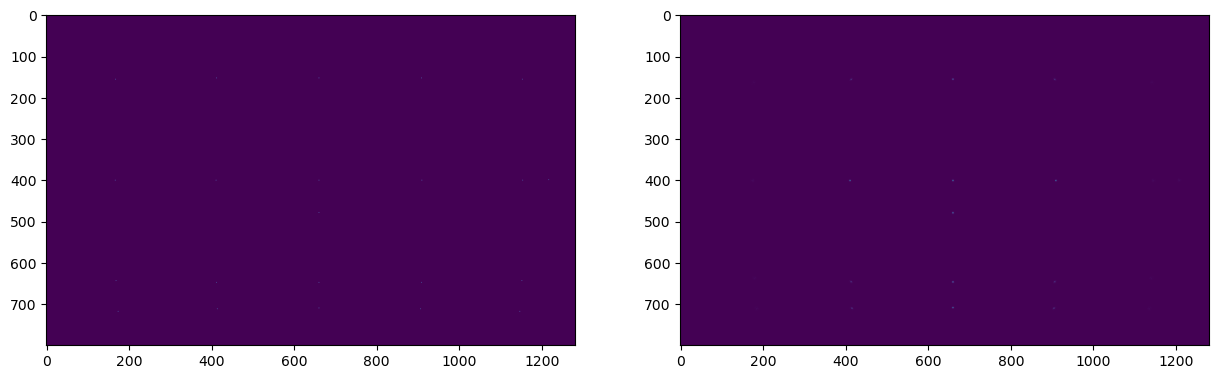

In [6]:
im, sim = flatsim.simulate_matrix(points_image, my_simulation=False, add_noise=False)
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(im)
axs[1].imshow(sim)

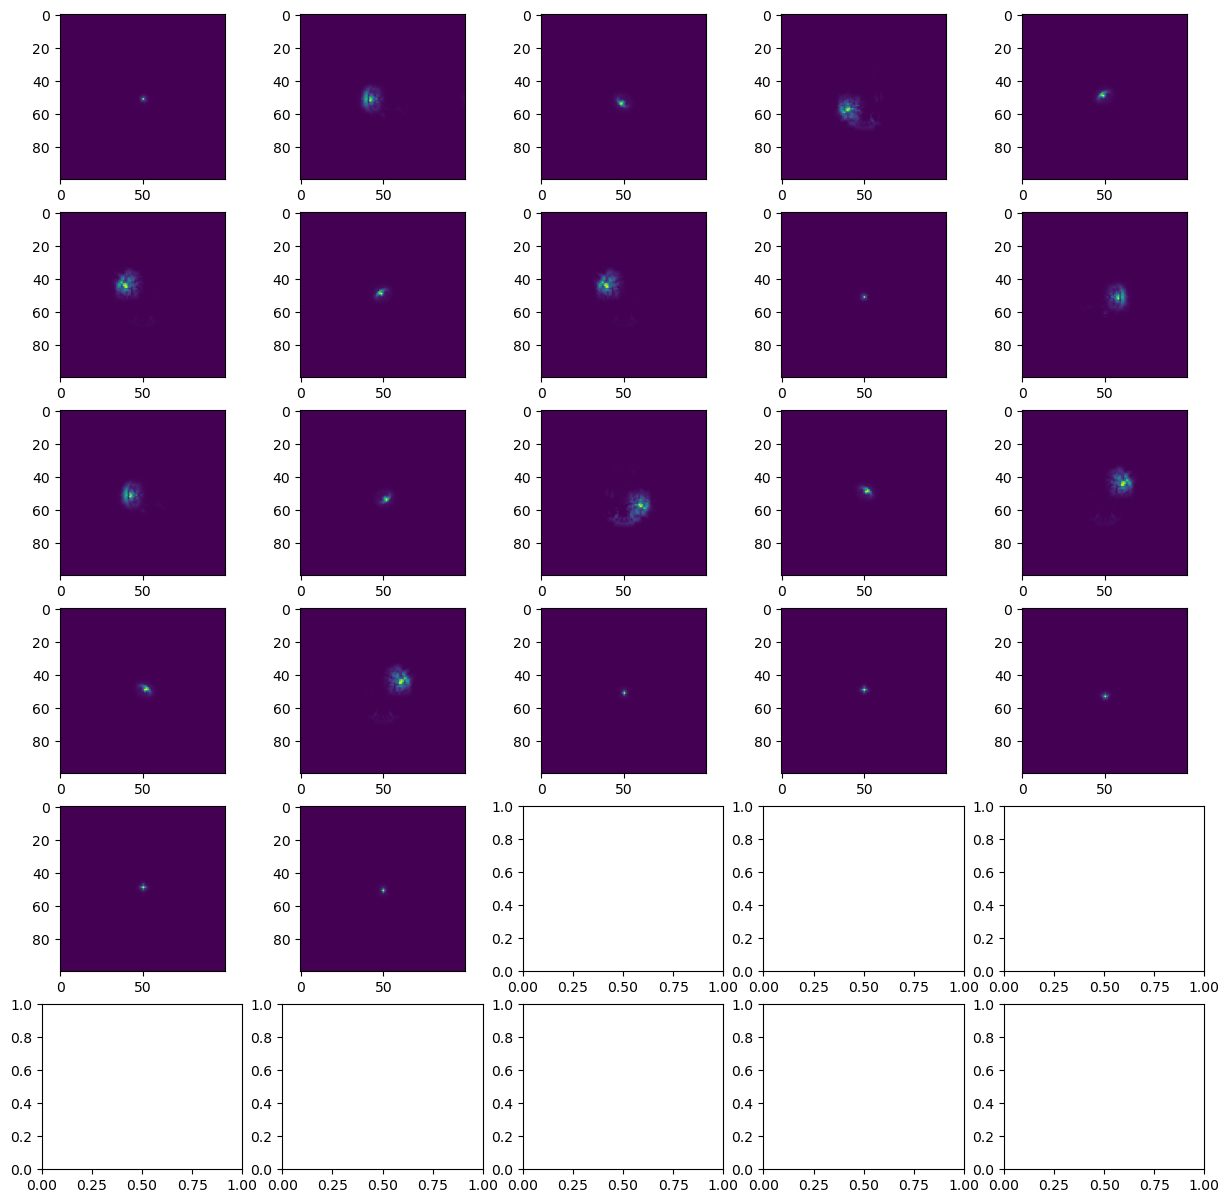

In [7]:
fig, axs = plt.subplots(6, 5, figsize=(15,15))
# for key in shifts.keys():
#     figrow = (key-1)//5
#     figcol = (key - 1)%5
#     x = shifts[key][1] + 660
#     y = shifts[key][0] + 400
# #     x = shifts[key][1]
# #     y = shifts[key][0]
#     axs[figrow, figcol].imshow(sim[y-50:y+50, x-50:x+50])
# set_trace()
for i in range(len(point_coords)):
    figrow = i//5
    figcol = i%5
    x,y = point_coords[i]
    axs[figrow, figcol].imshow(sim[y-50:y+50, x-50:x+50])

In [8]:
np.floor?